# Predicting Medical Insurance Cost Using Regression

Health Insurance cost is a major economic concern for most countries and corporate organisations. To remain in business and to make profits. insurance companies want to predict the exact amount to be charged on individual clients. To do this effectively, the companies lok at the health risk inherent to each client. Most appropriately, lifestyle and pre-existing condition are used to gauge the inherent risk associated with each patient and then to correctly predict the health Insurance charges for the individual.
This study aims to use some of these individual parameters as the independent variables, X to proedict the cost of health insurance, y(dpendent variable) for a particular individual. 

## Introduction

Several factors affects the overall health risk of individuals. Most of those factors have to do with individual's lifestyle and present health condition. The dataset lists some of those features determining the health risks of individuals and we want to use those factors in predicting the cost of Medical insurance for the individual.  

The purpose of this resarch is to try prediction with diferent regression models on the dataset and come out with the best regression model that can correctly predict the cost of Medical Isurance using the available data. All analysis was performed with python 3 using the 'Spyder' environment.

Our Target variable for the Regression studies is a numerical variable detailing the health insurance cost for each observation parameters. After necessary processing, the data is split and used for analysis. Five models were used to run the analysis and the results were compared with each other to chose the ones with the highest model scores.The data used for analysis was obtined from Kaggle.

The analytics process and results are presented below;

### Import Libraries

In [32]:
import os
os.getcwd()
os.chdir(r'C:\Users\MAIN\Desktop\Career Tools\ML\Data Science Portfolio Projects\ML Project\Med Insurance Regression')

In [33]:
# Importing Pandas, a data processing and CSV file I/O libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib. 

### Load the Dataset

The data contains the following columns:
    'age': age of insurance customers.
    'sex': sex of insurance customers.
    'bmi': avg. bmi for insurance customers.
    'children': number of children under the care of insurance customers.
    'smoker': shows if insurance customers smoke or not
    'region': shows the region of the country where the insurance customers live
    'charges': shows the insurance charges for the customers 

In [34]:
# Next, we read the dataset into a Pandas dataframe.
df_insurance = pd.read_csv('insurance_dataset.csv')

In [35]:
# Show the first five row.

df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Preprocessing

Let's check for any null values

In [36]:
# The isnull() method is used to check and manage NULL values in a data frame.
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [37]:
# Pandas describe() is used to view some basic statistical details of a data frame or a series of numeric values.
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [38]:
# Pandas info() function is used to get a concise summary of the dataframe.
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


Let's take a peek at the first and last five rows of the data for all columns.

In [39]:
print(df_insurance,5)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
7      37  female  27.740         3     no  northwest   7281.50560
8      37    male  29.830         2     no  northeast   6406.41070
9      60  female  25.840         0     no  northwest  28923.13692
10     25    male  26.220         0     no  northeast   2721.32080
11     62  female  26.290         0    yes  southeast  27808.72510
12     23    male  34.400         0     no  southwest   1826.84300
13     56  female  39.820         0     no  southeast  11090.7

##### Drop colums that we will not use. in this case we drop the region column because it has text info that the linear regression model cannot use.

In [46]:
df_insurance = df_insurance.drop('region', axis=1)

##### Handling Categorical Columns

The feature column "sex", "smoker" and "region" is categorical and has a "Yes/No", "male/female" and "region"  choices. We cannot feed values like this into a machine learning model. We need to convert the binary answers from strings of yes/no and other values to integers of 1/0. There are various methods to achieve this. We will use the "apply" method with a lambda expression. Pandas. apply() takes a function and applies it to all values of a Pandas series.

First, lets count the number of "Yes" and"No's", and "male" and "female" in the 'smoker' and 'sex' feature column.

In [40]:
df_insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [41]:
df_insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Let's convert the Yes to 1 and No to 0. Also, the  female to 1 and male to 0. Pandas. apply() . apply takes a function and applies it to all values of a Pandas series (e.g. sex and smoker).



In [42]:
df_insurance.loc[:,'sex'] = df_insurance['sex'].apply(lambda x: 0 if x=='male' else 1)
df_insurance['sex'].value_counts(0)

0    676
1    662
Name: sex, dtype: int64

In [43]:
df_insurance.loc[:,'smoker'] = df_insurance['smoker'].apply(lambda x: 0 if x=='no' else 1)
df_insurance['smoker'].value_counts(0)

0    1064
1     274
Name: smoker, dtype: int64

## Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!

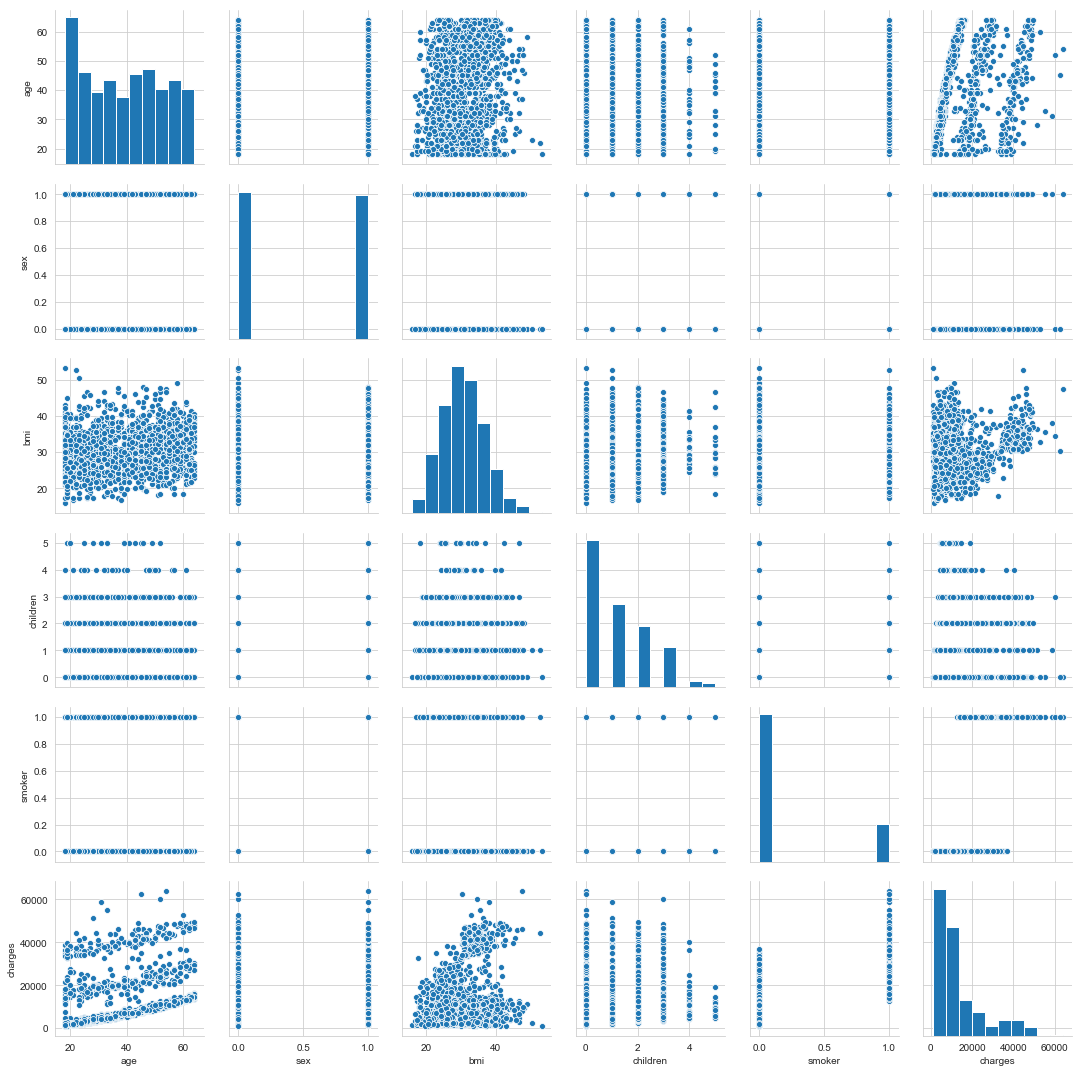

In [49]:
# Plot pairwise relationships in a dataset. By default, this function will create a grid of Axes such that each numeric variable in data will be
# shared across the y-axes across a single row and the x-axes across a single column.
sns.pairplot(df_insurance)

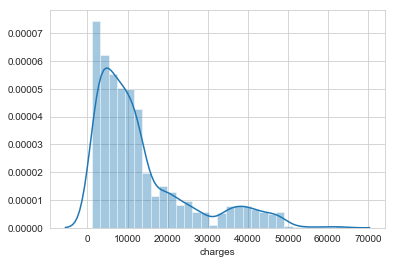

In [50]:
# It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation
# and hence we choose one particular column of the dataset.
sns.distplot(df_insurance['charges'])

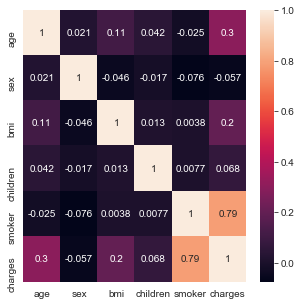

In [51]:
# The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph.
# The goal of the heatmap is to provide a colored visual summary of information.
#check correlation with seaborn heatmap
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
sns.heatmap(df_insurance.corr(), annot=True)

## Training a Linear Regression Model

Regression is a supervised machine learning process. It is similar to classification, but rather than predicting a label, we try to predict a continuous value. Linear regression defines the relationship between a target variable (y) and a set of predictive features (x). Simply stated, If you need to predict a number, then use regression.

Let's now begin to train our regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

Next, let's define the features and label. Briefly, feature is input; label is output. This applies to both classification and regression problems.

In [87]:
X = df_insurance[['age', 'sex', 'bmi', 'children', 'smoker']]
y = df_insurance['charges']

### Train - Test - Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model. Note that we are using 40% of the data for testing.



#### What is Random State?

If an integer for random state is not specified in the code, then every time the code is executed, a new random value is generated and the train and test datasets will have different values each time. However, if a fixed value is assigned -- like random_state = 0 or 1 or 101 or any other integer, then no matter how many times you execute your code the result would be the same, e.g. the same values will be in the train and test datasets. Thus, the random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order.

In [89]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Creating and Training the Model

In [90]:
# Import LinearRegression function from sklearn.model_selection
from sklearn.linear_model import LinearRegression

In [91]:
# LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets
# in the dataset, and the targets predicted by the linear approximation.
lm = LinearRegression()

In [92]:
# Train the Linear Regression Classifer
lm.fit(X_train,y_train) # TODO 3

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [93]:
# print the intercept
print(lm.intercept_)

-12377.699048348597


In [94]:
# Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,234.592830
sex,-41.829409
bmi,364.256063
children,474.555726
smoker,23561.902320


## Predictions from our Model


In [96]:
# Predict values based on linear model object.
predictions = lm.predict(X_test)

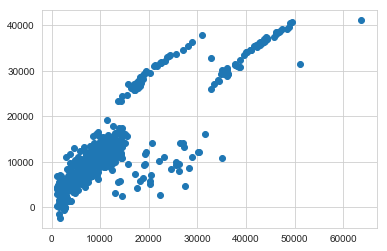

In [97]:
# Scatter plots are widely used to represent relation among variables and how change in one affects the other.
plt.scatter(y_test,predictions)

#### Residual Histogram

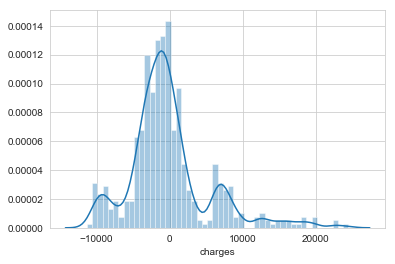

In [98]:
# It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation
# and hence we choose one particular column of the dataset.
sns.distplot((y_test-predictions),bins=50);

#### Different methods to use Linear regression and trying other regression models


In these cases, we will normalize the data and RFE to chose the best feature variables for our analysis. This process increases the predictive ability of the model by increasing the Adjusted R2-value.

In [99]:
#Normalise the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = (sc.fit_transform(X))
features=X.columns.values

sc_y = StandardScaler()
y_scaled = sc_y.fit_transform(y.values.reshape(len(y),1)).ravel()

C:\Users\MAIN\AnacondaProjects\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MAIN\AnacondaProjects\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [101]:
####################........Linear Regression.........#########################################
#import learning model(Linear Regression)
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
from sklearn.feature_selection import RFE

#Run RFE and select best subset of X
estimator = LinearRegression() #use regression model for regression problem
list_r2=[]
max_r2 = 0
for i in range(1,len(X.iloc[0])+1):
    selector = RFE(estimator, i, step=1)
    selector = selector.fit(X_scaled, y_scaled)
    adj_r2 = 1 - ((len(X)-1)/(len(X)-i-1))*(1-selector.score(X_scaled, y_scaled))
    list_r2.append(adj_r2)# mse = 
    if max_r2 < adj_r2:
        sel_features = selector.support_
        max_r2 = adj_r2
        
X_sub = X_scaled[:,sel_features]

Linear Regression was the first model used and the main parameters for comparison were the Mean Squared Error and the R-squared value.

In [102]:
#statistical summary of the model
import statsmodels.api as sm
X2=sm.add_constant(X_sub)  #investigate
model=sm.OLS(y,X2)
results=model.fit()
print(results.summary())

#split train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_scaled, test_size=0.3, random_state=0)

model1 = LinearRegression()
#Train our model
model1.fit(X_train,y_train)
#predict with the model
y_pred = model1.predict(X_test)
b0 =model1.intercept_
b1 =model1.coef_

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('intercept & coefficients: \n', model1.intercept_, model1.coef_)
print('mean squared error (training):', mean_squared_error(y_train, model1.predict(X_train)))
print('mean squared error (testing):', mean_squared_error(y_test, y_pred))
print('R-squared score(training):', r2_score(y_train, model1.predict(X_train)))
print('R-squared score(testing):', r2_score(y_test, y_pred))

#Run K-Fold using R2
from statistics import mean, stdev
from sklearn.model_selection import KFold, cross_val_score

shuffle = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(model1, X_sub, y_scaled, cv=shuffle)
print(scores)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:45:35   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.327e+04    165.883     79.999      0.0

#### KNearest  Neighbor Regression

In [104]:
#####################.......KNearestNeighbor Regression..................###################################
#import Learning model
from sklearn.neighbors import KNeighborsRegressor
Regressor = KNeighborsRegressor(n_neighbors=21, weights='distance', p=1) #by default p=2. tweak n_neighbords to check accuracy

#train classifier
Regressor.fit(X_train,y_train)

#predictions for test
y_pred = Regressor.predict(X_test)

#import performance measure tools
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
print('R-squared score(training):', r2_score(y_train, Regressor.predict(X_train)))
print('R-squared score(testing):',r2_score(y_test, y_pred))

#split X and y into K-Folds
#Run K-Fold using R2
shuffle = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(Regressor, X_sub, y_scaled, cv=shuffle)
print(scores)

R-squared score(training): 0.9994051250833346
R-squared score(testing): 0.8618773106651125
[0.87963956 0.86701068 0.76593545 0.85652739 0.77323749]


#### Random Forest Regression

In [108]:
#####################..........Random Forest..........#####################################################

#import Learning Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train,y_train)

model.score(X_test,y_test)

mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
print(rmse)
print('R-squared score(training):', r2_score(y_train, model.predict(X_train)))
print('R-squared score(testing):',r2_score(y_test, y_pred))

#Run K-Fold using R2
shuffle = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(model, X_sub, y_scaled, cv=shuffle)
print(scores)

#check Gridsearch for model2 = RandomForest
from sklearn.model_selection import GridSearchCV
param_dict= {'n_estimators':range(2,30), 'max_depth':range(1,30)}
model = GridSearchCV(model,param_dict)
model.fit(X_train,y_train)

model.score(X_test,y_test)
model.best_params_

C:\Users\MAIN\AnacondaProjects\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.3547704960290207
R-squared score(training): 0.9659975691807979
R-squared score(testing): 0.8843403592710597
[0.86938523 0.86411925 0.73667743 0.81767962 0.77966637]


C:\Users\MAIN\AnacondaProjects\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 4, 'n_estimators': 25}

#### AdaBoost Model

In [109]:
##############............AdaBoost Model.............#############################################################

#import learning model
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()

model.fit(X_train,y_train)

model.score(X_test,y_test)

mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
print(mse)
print('R-squared score(training):', r2_score(y_train, model.predict(X_train)))
print('R-squared score(testing):',r2_score(y_test, y_pred))

#split X and y into K-Folds
#Run K-Fold using R2
shuffle = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(model, X_sub, y_scaled, cv=shuffle)
print(scores)

#check Gridsearch for model3 = AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
param_dict= {'n_estimators':range(2,30)}
model = GridSearchCV(model,param_dict)
model.fit(X_train,y_train)

model.score(X_test,y_test)
model.best_params_

0.1258621048526774
R-squared score(training): 0.8256074761352636
R-squared score(testing): 0.8843403592710597
[0.85226222 0.84291664 0.74587901 0.82311345 0.7839721 ]


C:\Users\MAIN\AnacondaProjects\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_estimators': 2}

## Results Comparison

##### REGRESSION MODELS AND THEIR SCORES:
    'MODEL': Linear Regression  K Nearest Neighbor  Random Forest   AdaBoost. 
    'MSE':  0.230               0.17                 0.13           0.125.
    'R2':   0.7900              0.8400               0.8798         0.8618.
    
The results showed a high degree of prediction scores for the different models employed in the study as shown with the R2 value. From the scores, the Random Forest Classifier seem to be the best model for prediction, though the other ones gave a high degree of prediction scores too. This means that we can use the features provided to the health insurance cost of individuals with a high degree of certainty.
